In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.decomposition import TruncatedSVD

In [3]:
plt.style.use("ggplot")


In [4]:
amazon_ratings = pd.read_csv('Datasets/ratings_Beauty.csv')
amazon_ratings

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200
...,...,...,...,...
2023065,A3DEHKPFANB8VA,B00LORWRJA,5.0,1405296000
2023066,A3DEHKPFANB8VA,B00LOS7MEE,5.0,1405296000
2023067,AG9TJLJUN5OM3,B00LP2YB8E,5.0,1405382400
2023068,AYBIB14QOI9PC,B00LPVG6V0,5.0,1405555200


In [5]:
amazon_ratings.nunique()

UserId       1210271
ProductId     249274
Rating             5
Timestamp       4231
dtype: int64

In [6]:
amazon_ratings.isnull().sum()

UserId       0
ProductId    0
Rating       0
Timestamp    0
dtype: int64

In [8]:
amazon_ratings.shape

(2023070, 4)

In [9]:
popular_products = pd.DataFrame(amazon_ratings.groupby('ProductId')['Rating'].count())
most_popular = popular_products.sort_values('Rating', ascending=False)
most_popular.head(10)

,Rating
ProductId,
B001MA0QY2,7533
B0009V1YR8,2869
B0043OYFKU,2477
B0000YUXI0,2143
B003V265QW,2088
B000ZMBSPE,2041
B003BQ6QXK,1918
B004OHQR1Q,1885
B00121UVU0,1838


In [43]:
most_popular

,Rating
ProductId,
B001MA0QY2,7533
B0009V1YR8,2869
B0043OYFKU,2477
B0000YUXI0,2143
B003V265QW,2088
...,...
B004U81OBC,1
B004U7R0EI,1
B004U7Q2O2,1


In [49]:
mean_ratings = pd.DataFrame(amazon_ratings.groupby('ProductId')['Rating'].mean())
most_popular_mean = mean_ratings.sort_values('Rating', ascending=False)
most_popular_mean.loc['B001MA0QY2']

Rating    4.321386
Name: B001MA0QY2, dtype: float64

In [50]:
most_popular_mean

,Rating
ProductId,
0205616461,5.0
B00551HYQC,5.0
B0054ZSIXC,5.0
B00550UX52,5.0
B00550YQP0,5.0
...,...
B00586PNN0,1.0
B00585I1VW,1.0
B005854H5G,1.0


<Axes: xlabel='ProductId'>

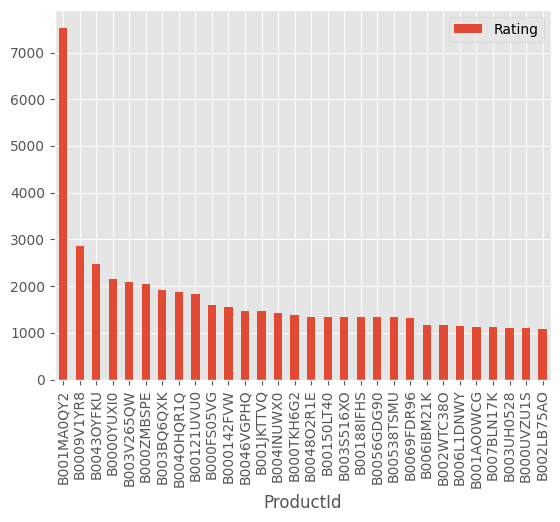

In [10]:
most_popular.head(30).plot(kind = "bar")

### A statistical approach to the recommender system

#### Building the utility matrix

In [11]:
# Subset of Amazon Ratings
amazon_ratings1 = amazon_ratings.head(10000)

In [12]:
amazon_ratings1

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200
...,...,...,...,...
9995,A9V4K2YJ2DWTQ,B000052YQ2,3.0,1396396800
9996,A3033CXHQ0NF8J,B000052YQ2,5.0,1291248000
9997,A1Z66KHEXSF3L5,B000052YQ2,3.0,1361577600
9998,A1Y7D2DRVBN59D,B000052YQ2,5.0,1402099200


In [16]:
amazon_ratings1.nunique()

UserId       9697
ProductId     886
Rating          5
Timestamp    2320
dtype: int64

There are 9697 users and 886 unique products in this dataframe amazon ratings 1 which is a miniature version of the original dataframe to simplify our mathematical calculations. With this we form the ratings utility matrix which consists of all possible user - item preferences as a matrix. The rows represent the users and the columns represent the products. 

In [13]:
ratings_utility_matrix = amazon_ratings1.pivot_table(values='Rating', index='UserId', columns='ProductId', fill_value=0)
ratings_utility_matrix.head()

ProductId,0205616461,0558925278,0733001998,0737104473,0762451459,1304139212,1304139220,130414089X,130414643X,1304146537,...,B000052YPE,B000052YPF,B000052YPG,B000052YPH,B000052YPM,B000052YPU,B000052YPV,B000052YPY,B000052YQ0,B000052YQ2
UserId,,,,,,,,,,,,,,,,,,,,,
A00205921JHJK5X9LNP42,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A024581134CV80ZBLIZTZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A03056581JJIOL5FSKJY7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A03099101ZRK4K607JVHH,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0505229A7NSH3FRXRR4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
ratings_utility_matrix.shape

(9697, 886)

Next we take the transpose of the matrix due to which we get a matrix with the products as rows and the columns as users  

In [17]:
X = ratings_utility_matrix.T
X.shape

(886, 9697)

This helps in reducing the dimensions of the matrix from 886 x 9697 to 886 x 10, to reduce the curse of dimensionality. 

In [20]:
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

(886, 10)

In [23]:
decomposed_matrix

array([[ 4.58278638e-16, -1.30044011e-13, -5.34036792e-14, ...,
         1.02763711e-12,  2.50997164e-12,  7.27326997e-13],
       [ 1.31522023e-14, -2.83050644e-13, -3.88605025e-13, ...,
         3.74867329e-12,  2.45824870e-11,  1.32233750e-11],
       [-3.54065961e-16,  3.61658697e-15,  3.30805721e-15, ...,
        -4.94322384e-14, -2.62549000e-13, -4.35517197e-13],
       ...,
       [ 3.30024089e-06,  2.27950631e-01, -1.04114212e-02, ...,
        -3.74027775e-03, -3.07663468e-05, -4.95262707e-02],
       [-2.61824206e-07,  8.30725305e-04, -2.42459759e-05, ...,
        -4.94295744e-04,  9.90783650e-05, -3.60538835e-03],
       [-2.63636389e-04,  4.24415804e-01,  3.60885785e-01, ...,
        -1.75184385e-02,  9.08214847e-02,  5.38613335e-01]])

building the correlation matrix for the products to check the correlation between the various products involved

In [24]:
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(886, 886)

In [26]:
X.shape

(886, 9697)

In [25]:
X.index[99]

'6117036094'

In [27]:
i = "6117036094"

product_names = list(X.index)
product_ID = product_names.index(i)
product_ID

99

In [81]:
amazon_ratings1[amazon_ratings1['ProductId'] == '6117036094']

,UserId,ProductId,Rating,Timestamp
294,ANLSZ40VRRB21,6117036094,5.0,1400457600


In [29]:
len(product_names)

886

In [33]:
correlation_product_id = correlation_matrix[product_ID]
correlation_product_id

array([-0.50074725, -0.28917264, -0.28855805,  0.79732859,  0.85104878,
        0.61017013,  0.60184355,  0.02110354,  0.610086  ,  0.70367638,
        0.60184355,  0.7046148 ,  0.60076156,  0.61367064,  0.61017013,
        0.60184355,  0.60184355, -0.06990354,  0.60076108, -0.2748251 ,
        0.70894317, -0.04717053,  0.59792953,  0.7047749 ,  0.70869706,
        0.69176378,  0.69543753,  0.64293609,  0.7047749 ,  0.69116032,
        0.69278401,  0.61044646,  0.62917294,  0.69157464,  0.70465397,
        0.61017013,  0.69157464, -0.79196564,  0.61004949,  0.64192174,
        0.64195499,  0.69176378,  0.61047998,  0.61017013,  0.61017013,
        0.61017013,  0.7047749 ,  0.61017013,  0.61010466,  0.64192174,
        0.69198763,  0.63691162, -0.70668106, -0.34235486, -0.11101375,
        0.84020402,  0.85205885, -0.32024073, -0.79863444, -0.6346139 ,
        0.82304417, -0.32130407,  0.8199586 ,  0.20290629,  0.42704959,
        0.66970737,  0.11047425,  0.03104324,  0.28693633,  0.59

So if we assume that the customer has bought the product 6117036094 then we recommend 10 items to the customer closely correlated to the item the customer has bought before.

In [36]:
Recommend = list(X.index[correlation_product_id > 0.90])

# Removes the item already bought by the customer
Recommend.remove(i) 

Recommend[0:9]

['9601420347',
 '978807247X',
 '9788073514',
 '9788080626',
 '9790774443',
 '9790774907',
 '9790779925',
 '9790786069',
 '9790787510']

### A deep learning approach to the recommender system
